In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
from utils.HumanSegmenation import HumanSegModel
%matplotlib inline
from matplotlib import pyplot as plt
import cv2, os
import random

# helper function to stylize the output image, blur the image background or splash color only on human 
def stylize(img_rgba, style='depth'):
    image, mask = img_rgba[:,:,:3], img_rgba[:,:,3:]
    fg_mask, bg_mask = (1-mask/255.0), mask/255.0
    
    styled = image
    if style == 'depth':
        styled = cv2.blur(image,(6,6))
    elif style == 'splash':
        styled = np.stack([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)]*3,axis=-1)
        
    return ((styled*fg_mask+image*bg_mask).astype(np.uint8))

### Load the model and test it with sample images

In [2]:
## Specify the input size and the dataset which is trained. 
humanSegM = HumanSegModel()

In [3]:
image_path = './samples'
images = [os.path.join(image_path,f) for f in os.listdir(image_path) if 'png' in f or 'jpg' in f or 'jpeg' in f ]

## Select 10 random images for test
NUM_TO_TEST = 100
random.Random(1).shuffle(images)
results = [humanSegM.predict(image) for image in images[:NUM_TO_TEST]]

### Visualize  image and the predicted foreground

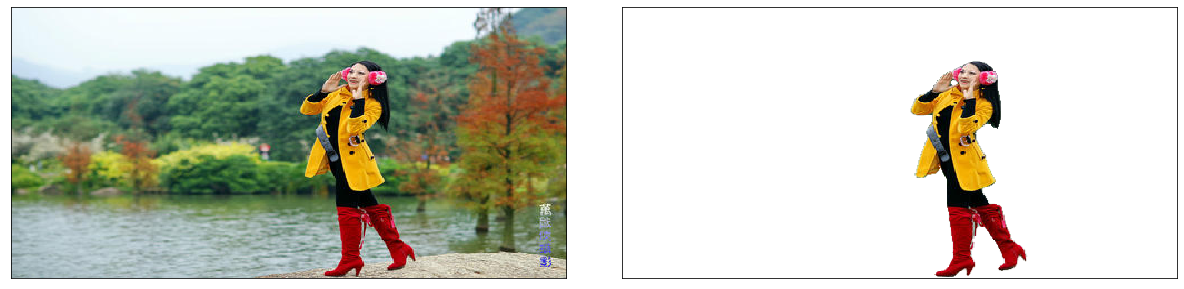

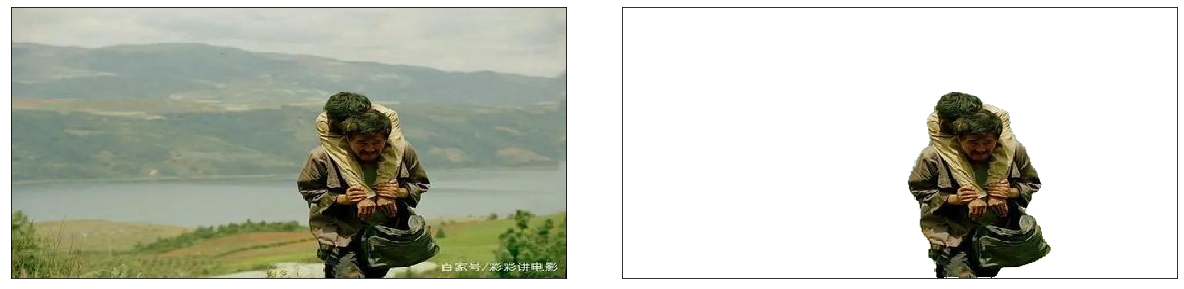

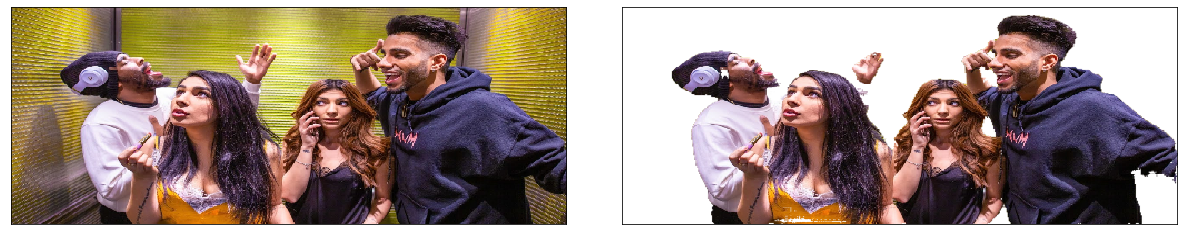

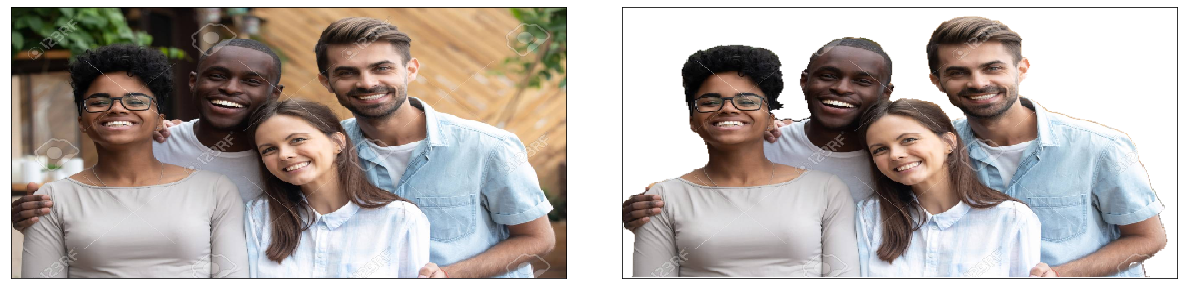

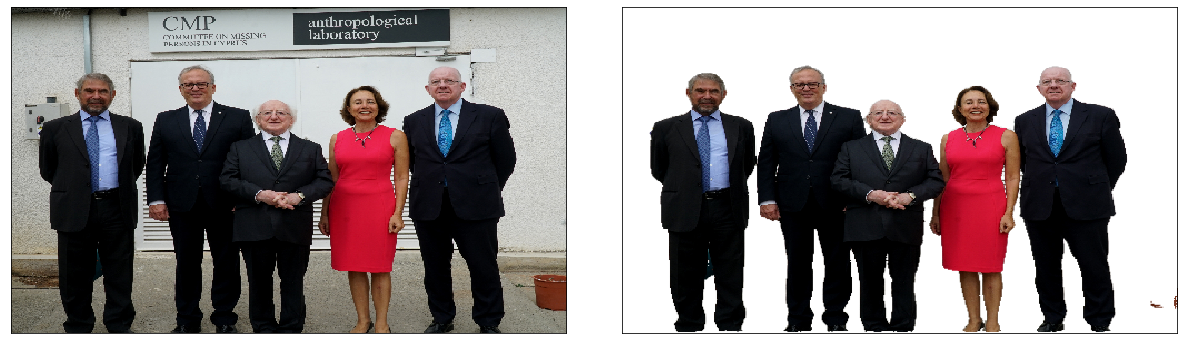

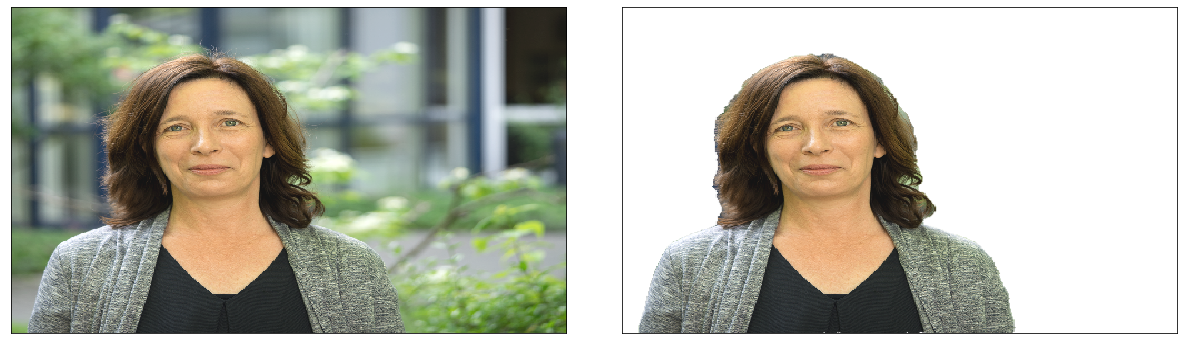

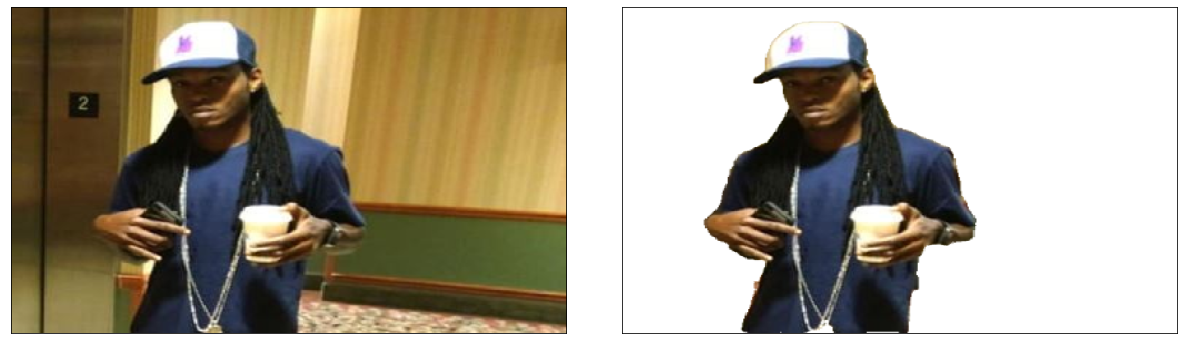

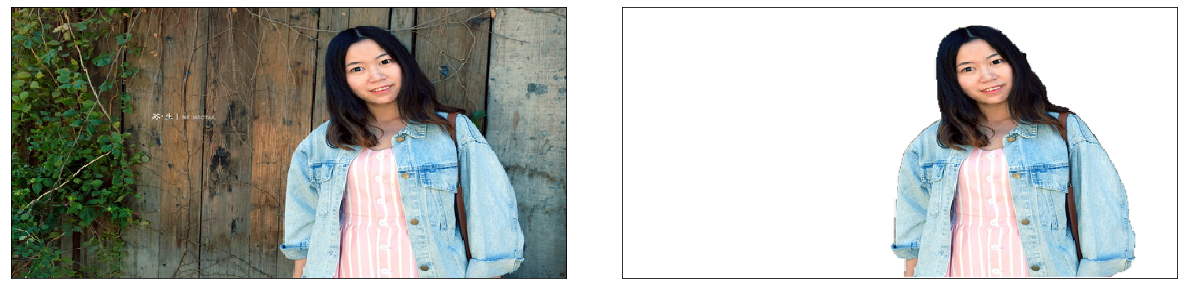

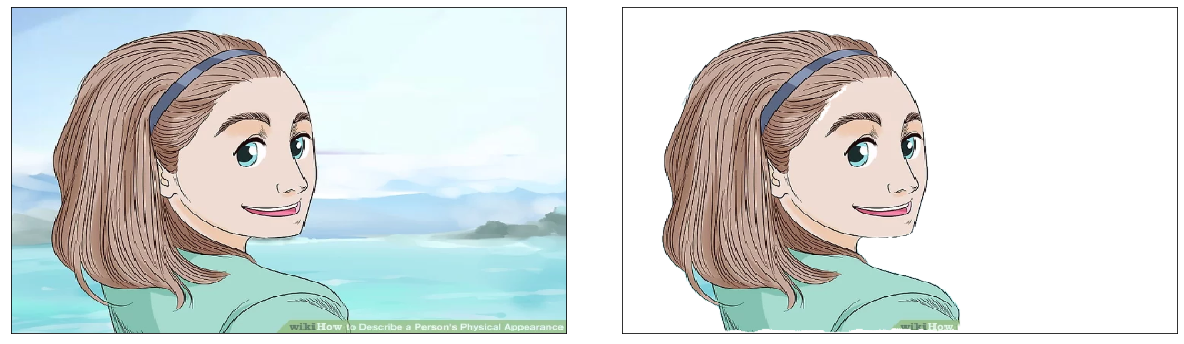

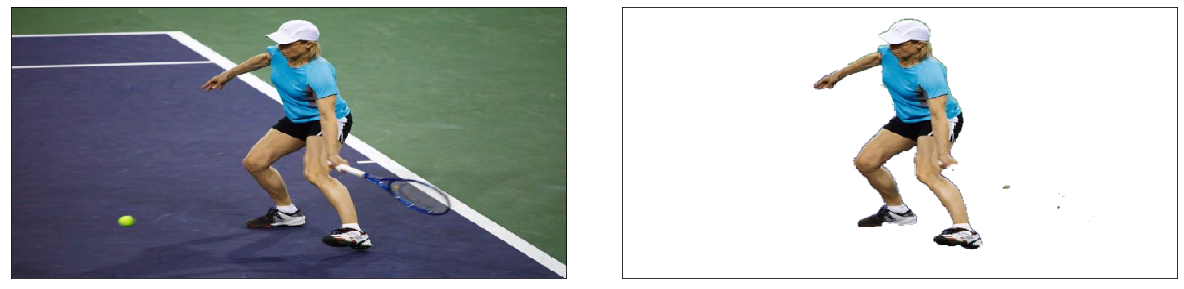

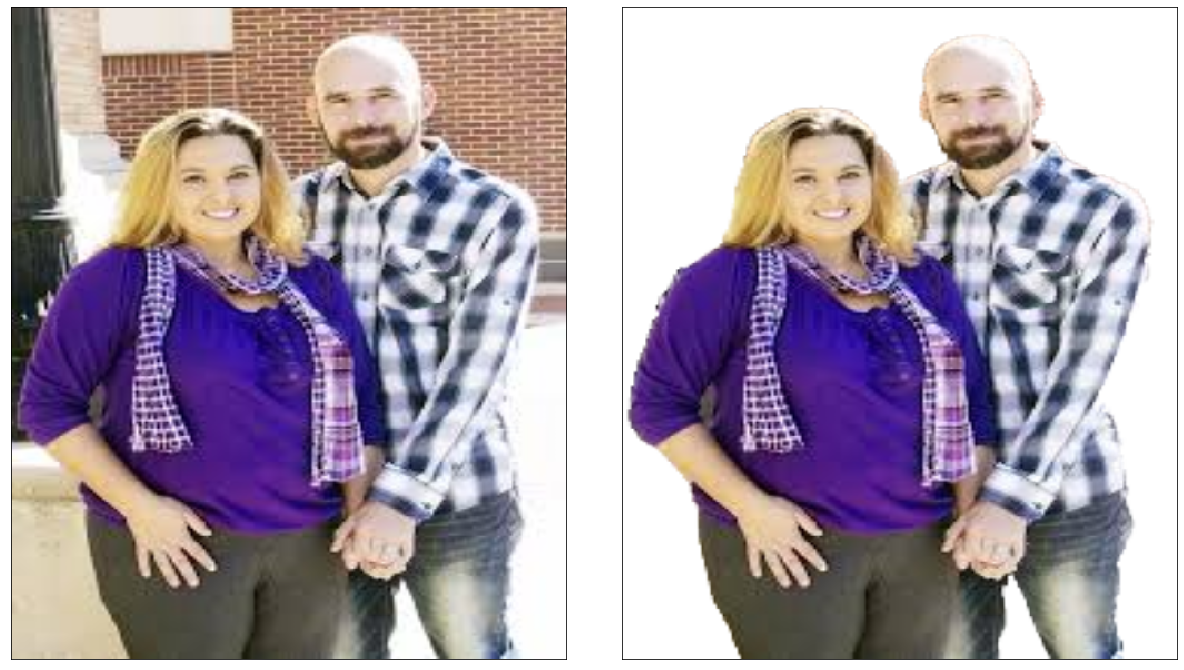

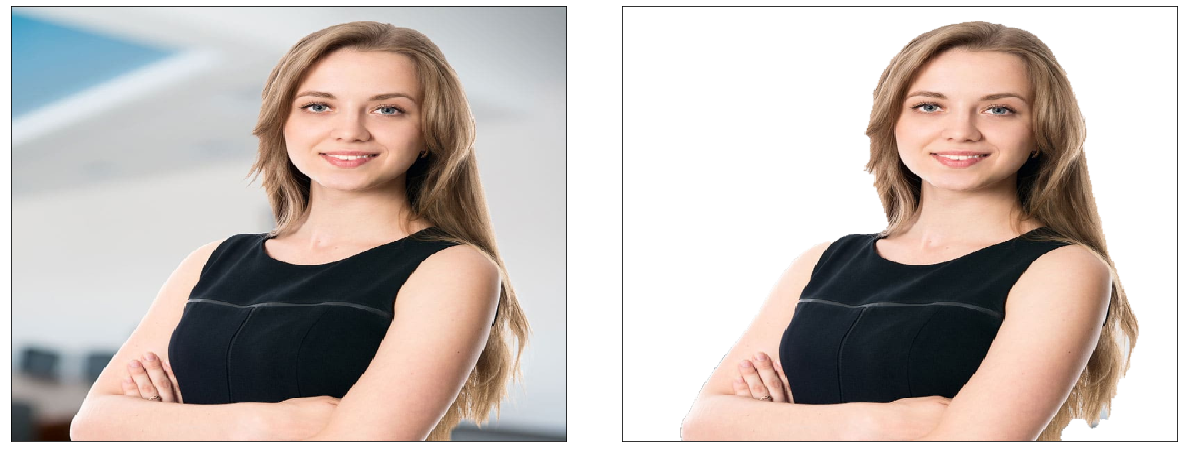

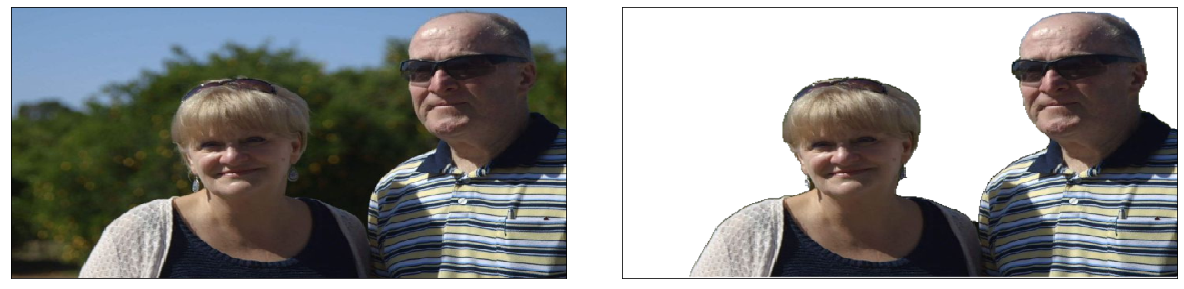

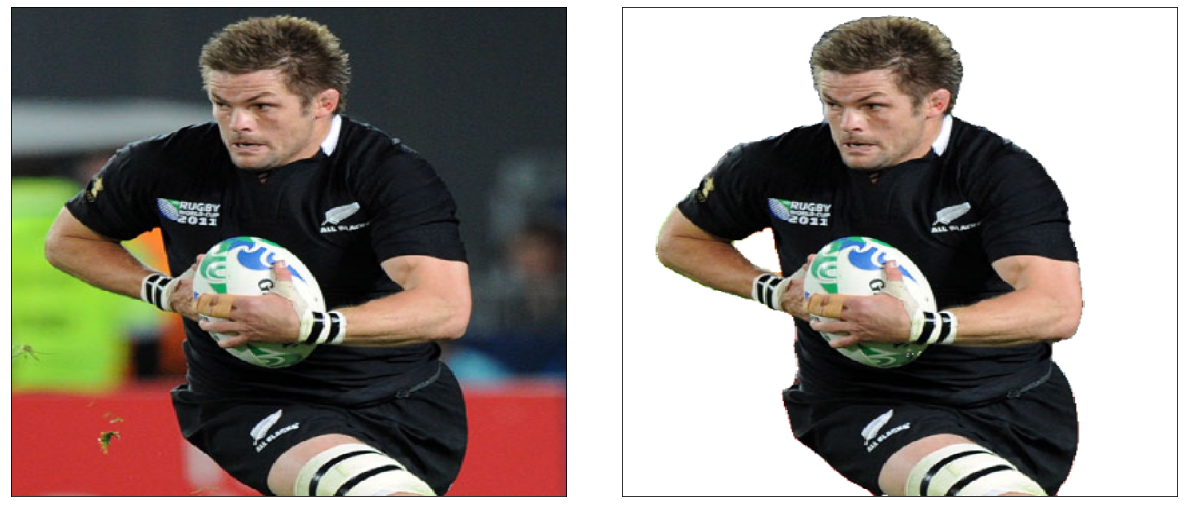

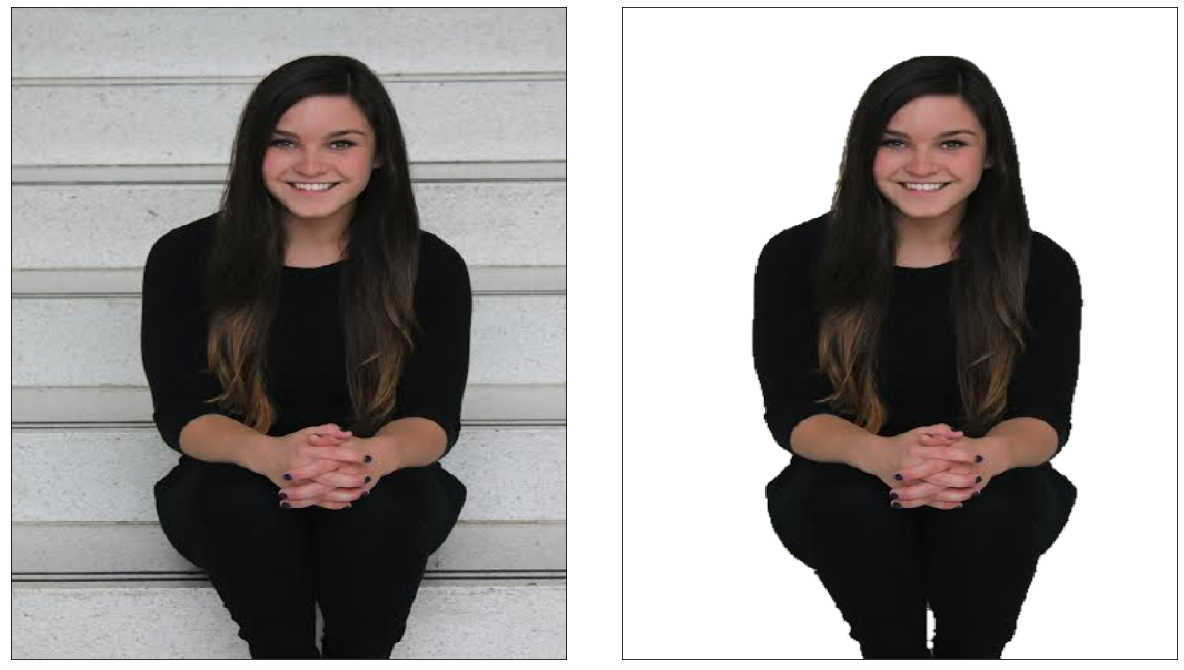

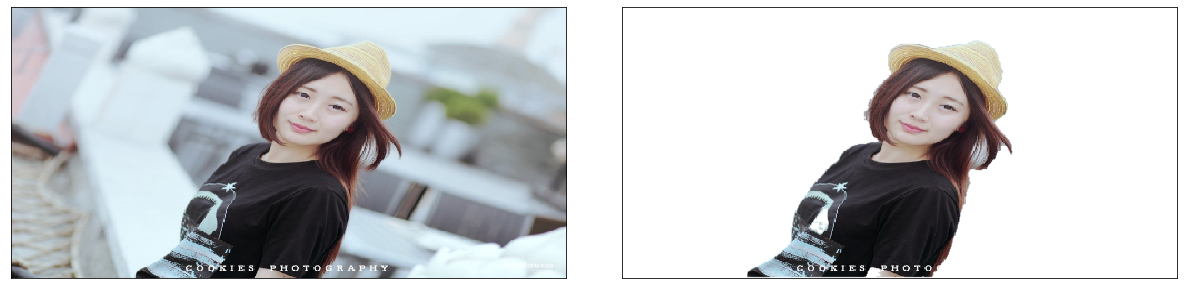

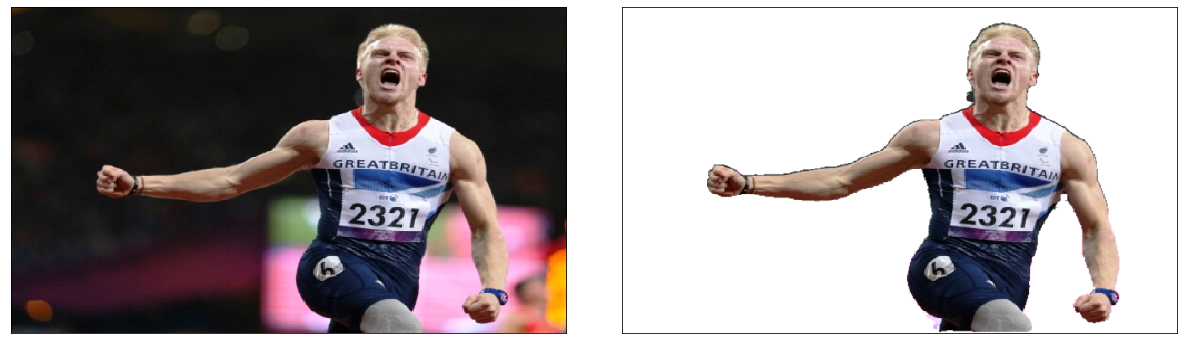

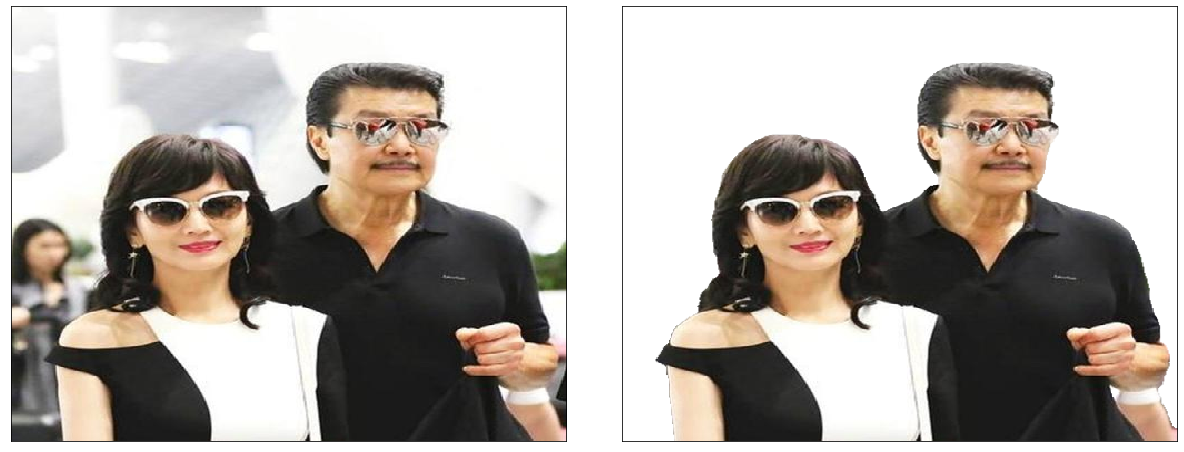

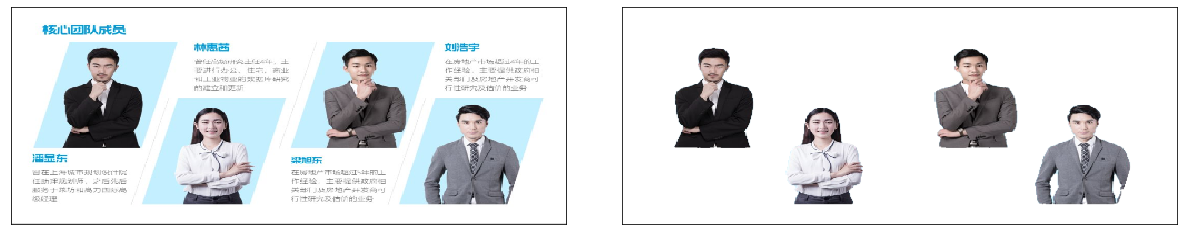

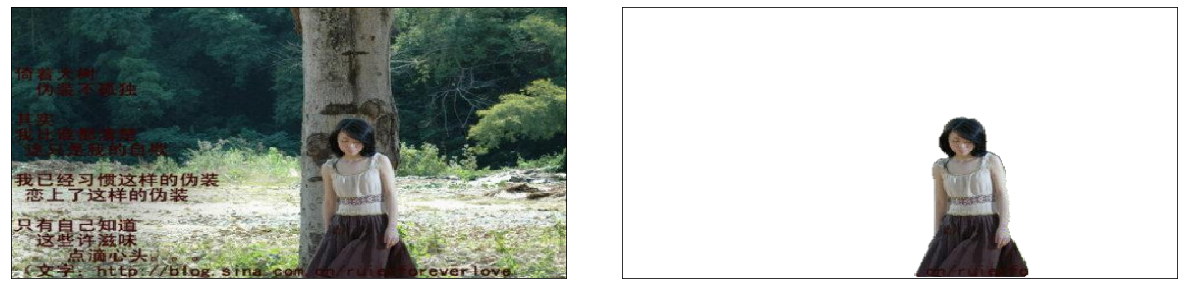

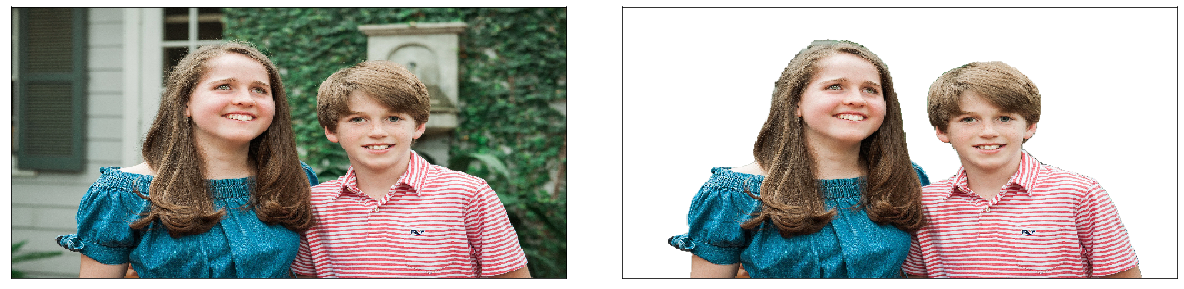

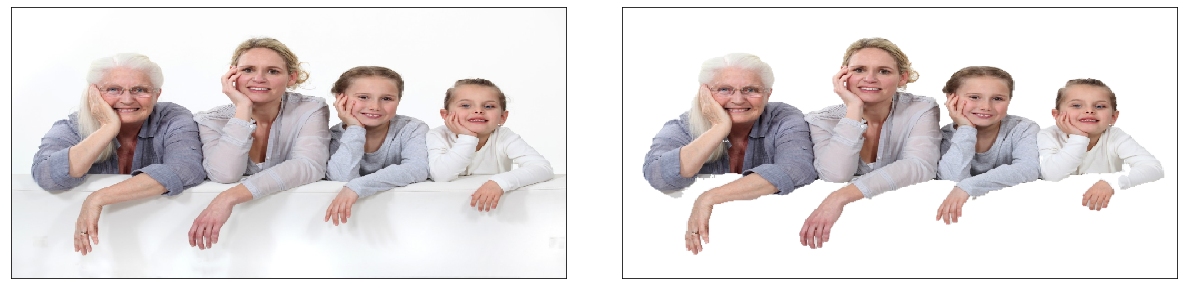

In [4]:
num_to_display = min(NUM_TO_TEST, len(images)) 
for i in range(num_to_display):
    img = cv2.cvtColor(cv2.imread(images[i]),cv2.COLOR_BGR2RGB)
    w, h = img.shape[:2]
    tgt_width = 500
    tgt_height = int(tgt_width*w/h)
    
    fig=plt.figure(figsize=(18, int(16*tgt_height/(2*tgt_width))))     
    fig.add_subplot(1, 2, 1)
    plt.subplots_adjust(wspace=0.0001, hspace=0.0001, right=0.95, left= 0.05)
    plt.xticks([])
    plt.yticks([])
    resized = cv2.resize(img,(tgt_width, tgt_height))
    plt.imshow(resized,aspect='auto')
    fig.add_subplot(1, 2, 2)
    
    plt.subplots_adjust(wspace=0.1, hspace=0.1,right=0.95, left=0.05)
    plt.xticks([])
    plt.yticks([])
    grabed = cv2.resize(results[i][1],(tgt_width, tgt_height))
    plt.imshow(grabed,aspect='auto')   
    plt.savefig('./samples/results/%s.png'%i)
plt.show()